In [1]:
import pandas as pd
import csv
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import spacy
from spacy_langdetect import LanguageDetector

import import_ipynb
import data_preprocess_analysis as da

importing Jupyter notebook from data_preprocess_analysis.ipynb


In [3]:
df_gpt = da.Preprocess.preprocess('data/data_gpt.csv')
df_output.to_csv('data\data_gpt_processed', index=False, sep=";") 
df_llama = da.Preprocess.preprocess('data/data_llama_processed.csv')

In [5]:
# Counting the number of unique occupations
unique_occupations_count = df_llama['Occupation'].nunique()
print(f'The number of unique occupations in Llama is: {unique_occupations_count}')

unique_occupations_count = df_gpt['Occupation'].nunique()
print(f'The number of unique occupations in GPT is: {unique_occupations_count}')

The number of unique occupations in Llama is: 273
The number of unique occupations in GPT is: 328


In [6]:
unique_occupations_llama = set(df_llama['Occupation'].unique())
unique_occupations_gpt = set(df_gpt['Occupation'].unique())

shared_occupations = unique_occupations_llama.intersection(unique_occupations_gpt)

shared_occupations_count = len(shared_occupations)
print(shared_occupations)

print(f'The number of shared occupations between Llama and GPT is: {shared_occupations_count}')


{'straatartiest', 'makelaar', 'banketbakker', 'journalist', 'accountant', 'glazenier', 'stadsgids', 'tuinman', 'museumconservator', 'verhalenverteller', 'undercover', 'psycholoog', 'havenarbeider', 'chef', 'restauranthouder', 'data-analist', 'bouwvakker', 'boer', 'detective', 'fotograaf', 'gids', 'zakenvrouw', 'florist', 'baristus', 'landschapsarchitect', 'onderzoeker', 'interieurontwerper', 'tuinier', 'bakker', 'architect', 'illustrator', 'kunstenaar', 'arts', 'modeontwerper', 'boekhandelaar', 'schilder', 'tuinontwerper', 'hacker', 'havenmeeser', 'visser', 'ondernemer', 'advocaat', 'docent', 'uitvinder', 'forensisch psycholoog', 'dokter', 'taxidermist', 'moordenaar', 'meubelmaker', 'marketeer', 'bibliothecaris', 'tuinarchitect', 'juwelier', 'ceo', 'schrijver', 'antiquair', 'timmerman', 'verpleegser', 'botanicus', 'inspecteur', 'huurmoordenaar', 'restaurateur', 'archeoloog', 'boekverkooper', 'beeldhouwer', 'software-ingenieur', 'houthakker', 'historicus', 'marinebioloog', 'wijnmaker', 

In [7]:
# Count the number of appearances for each unique occupation
gpt_counts = df_gpt['Occupation'].value_counts().reset_index()
gpt_counts.columns = ['Occupation', 'GPT_Count']

llama_counts = df_llama['Occupation'].value_counts().reset_index()
llama_counts.columns = ['Occupation', 'Llama_Count']

# Merge the counts
merged_counts = pd.merge(gpt_counts, llama_counts, on='Occupation', how='outer').fillna(0)

merged_counts['Total'] = merged_counts['GPT_Count'] +  merged_counts['Llama_Count']
top_10_occupations = merged_counts.sort_values(by='Total', ascending=False).head(10)

print(top_10_occupations)

                Occupation  GPT_Count  Llama_Count   Total
16               architect      574.0        636.0  1210.0
119              detective      371.0        554.0   925.0
91                    chef      478.0         33.0   511.0
408               schilder       20.0        487.0   507.0
263             journalist       23.0        377.0   400.0
200              fotograaf       97.0        251.0   348.0
3                 advocaat      262.0         70.0   332.0
414              schrijver        6.0        285.0   291.0
15              archeoloog      222.0          2.0   224.0
190  forensisch psycholoog      191.0          1.0   192.0


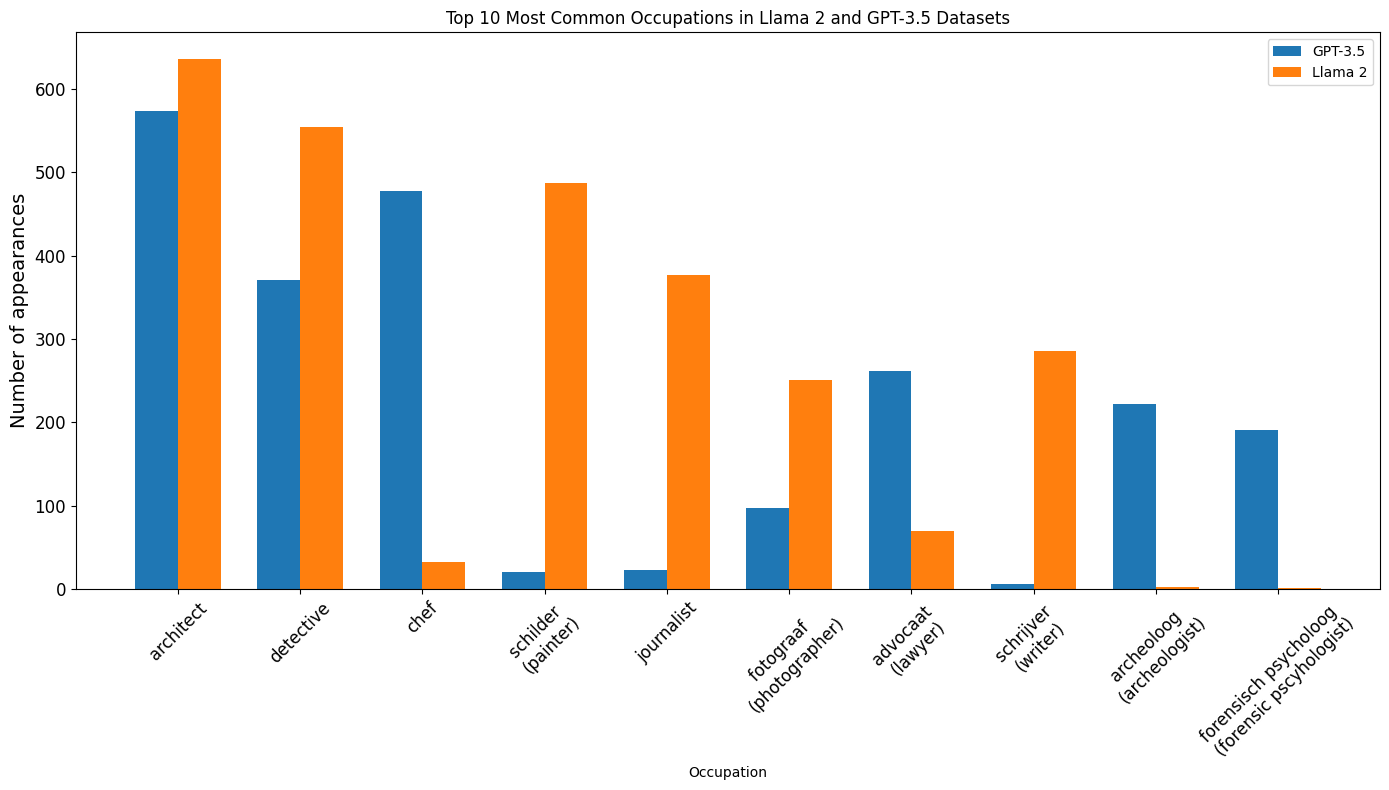

In [8]:
# Count the number of appearances of each occupation
gpt_counts = df_gpt['Occupation'].value_counts().reset_index()
gpt_counts.columns = ['Occupation', 'GPT_Count']

llama_counts = df_llama['Occupation'].value_counts().reset_index()
llama_counts.columns = ['Occupation', 'Llama_Count']

# Merge the counts
merged_counts = pd.merge(llama_counts, gpt_counts, on='Occupation', how='outer').fillna(0)

# Sort by the highest combined counts and get the top 10
merged_counts['Total'] = merged_counts['GPT_Count'] + merged_counts['Llama_Count']
top_10_occupations = merged_counts.sort_values(by='Total', ascending=False).head(10)

# Define custom x-axis labels
occupation_labels = ['architect', 'detective', 'chef', 'schilder (painter)', 'journalist', 'fotograaf (photographer)', 'advocaat (lawyer)', 'schrijver (writer)', 'archeoloog (archeologist)', 'forensisch psycholoog (forensic pscyhologist)']

custom_labels = [label.replace('(', '\n(') for label in occupation_labels]
                 
plt.figure(figsize=(14, 8)) 
bar_width = 0.35
index = range(len(top_10_occupations))

bar1 = plt.bar(index, top_10_occupations['GPT_Count'], bar_width, label='GPT-3.5')
bar2 = plt.bar([i + bar_width for i in index], top_10_occupations['Llama_Count'], bar_width, label='Llama 2')

plt.xlabel('Occupation')
plt.ylabel('Number of appearances', fontsize=14) 
plt.title('Top 10 Most Common Occupations in Llama 2 and GPT-3.5 Datasets')
plt.xticks([i + bar_width / 2 for i in index], custom_labels[:len(top_10_occupations)], rotation=45, ha='center', fontsize=12) 
plt.yticks(fontsize=12) 

plt.tight_layout()
plt.show()


In [9]:
# Top 10 occupations per gender

top_occupations_by_gender = df_llama.groupby('Gender_ENG')['Occupation'].value_counts().groupby(level=0).head(10)

for gender, occupations in top_occupations_by_gender.groupby(level=0):
    print(f"Top 10 occupations for {gender}:")
    print(occupations)
    print()


Top 10 occupations for Female:
Gender_ENG  Occupation      
Female      architect           361
            journalist          312
            detective           207
            schilder            170
            fotograaf           161
            ambtenaar            88
            schrijver            82
            kunstenaar           78
            geluidstechnicus     66
            astronaut            61
Name: count, dtype: int64

Top 10 occupations for Male:
Gender_ENG  Occupation  
Male        detective       324
            schilder        315
            architect       269
            schrijver       201
            zakenpersoon    131
            fotograaf        90
            timmerman        77
            beeldhouwer      72
            journalist       55
            advocaat         44
Name: count, dtype: int64

Top 10 occupations for Neutral:
Gender_ENG  Occupation  
Neutral     detective       23
            chef            16
            journalist      10
  

### GPT-3.5

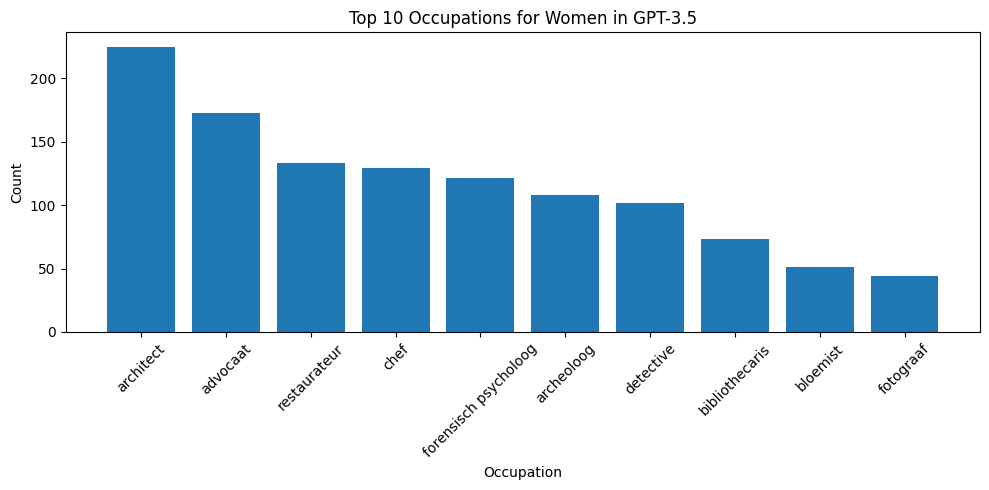

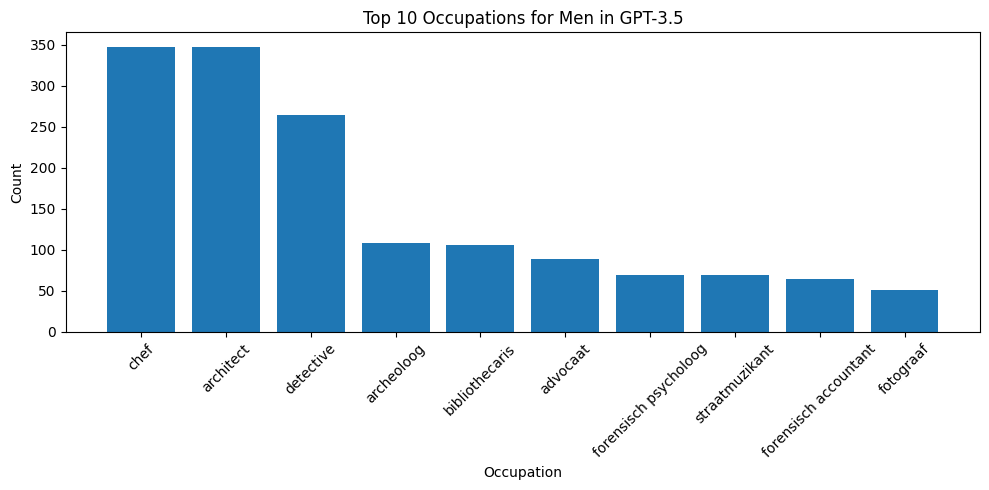

In [11]:
da.Analysis.plot_top_occ_gender(df_gpt, 10)

Gender_ENG             Female  Male  Neutral  Total
Occupation                                         
architect                 224   347        2    573
chef-kok                  108   301        1    410
detective                  77   242        3    322
advocaat                  173    89        0    262
archeoloog                 84   108        6    198
bibliothecar               73   106        2    181
forensisch psycholoog     111    64        1    176
restaurateur              133    33        1    167
fotograaf                  44    51        2     97
straatmuzikant             15    69        0     84


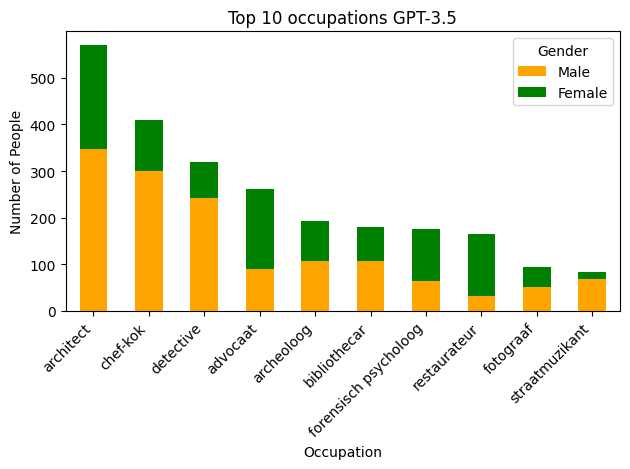

In [ ]:
df_top_occupations_gpt = da.Analysis.get_top_occupations(df_gpt, 10)
print(df_top_occupations_gpt)
da.Analysis.plot_top_occupations(df_top_occupations_gpt, 'top10-gpt.png', 'Top') 

Top 10 odds ratio occupations: [('timmerman', 21.632356231819198), ('horlogemaker', 19.892865130843212), ('politieman', 16.41854748603352), ('havenarbeider', 16.41854748603352), ('bankier', 14.683716774625866), ('brandweerman', 14.683716774625866), ('kok', 12.950435365036839), ('filosoof', 9.488512157037698), ('huurmoordenaar', 9.488512157037698), ('schatzoeker', 7.759866220735786)]
Bottom 10 odds ratio occupations: [('verpleegser', 0.09543240101886885), ('forensisch', 0.07804058839002084), ('landschapsarchitecte', 0.0504182977442034), ('interieurontwerper', 0.0504182977442034), ('botanist', 0.0504182977442034), ('weddingplanner', 0.0504182977442034), ('interieurontwerpser', 0.04508768025115091), ('modeontwerpser', 0.03908329479471764), ('zakenvrouw', 0.02077486388039932), ('archeologe', 0.01734671166485735)]


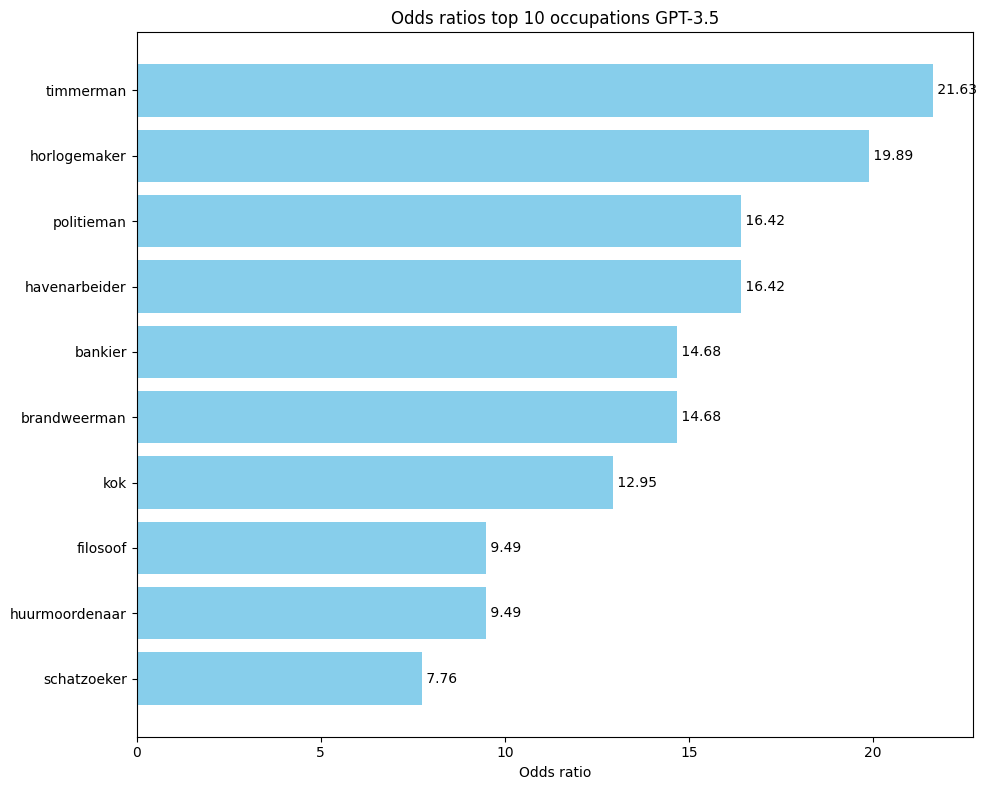

Bottom 10 odds ratio occupations: [('verpleegser', 0.09543240101886885), ('forensisch', 0.07804058839002084), ('landschapsarchitecte', 0.0504182977442034), ('interieurontwerper', 0.0504182977442034), ('botanist', 0.0504182977442034), ('weddingplanner', 0.0504182977442034), ('interieurontwerpser', 0.04508768025115091), ('modeontwerpser', 0.03908329479471764), ('zakenvrouw', 0.02077486388039932), ('archeologe', 0.01734671166485735)]


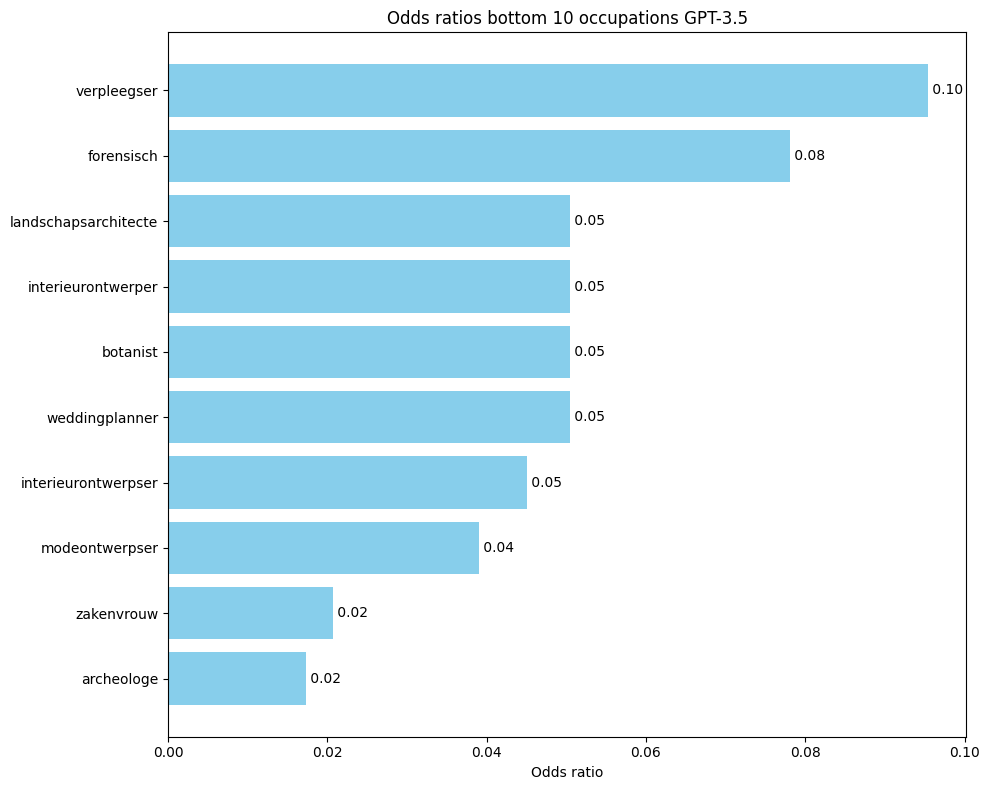

In [ ]:
'''
Odds ratio GPT-3.5
'''    

top_10_odds, bottom_10_odds = da.Analysis.odds_ratio(df_gpt)
print("Top 10 odds ratio occupations:", top_10_odds)
print("Bottom 10 odds ratio occupations:", bottom_10_odds)

da.Analysis.plot_odds_ratio(top_10_odds, 'top_10_odds_ratio_llama.png', 'top')

print("Bottom 10 odds ratio occupations:", bottom_10_odds)
da.Analysis.plot_odds_ratio(bottom_10_odds, 'bottom_10_odds_ratio_gpt.png', 'bottom')


           Genre             Occupation  Count                        Gender_Distribution
literaire fictie              architect    196   {'Male': 98, 'Female': 97, 'Neutral': 1}
literaire fictie         bibliothecaris    138   {'Male': 87, 'Female': 50, 'Neutral': 1}
literaire fictie             archeoloog    122   {'Male': 64, 'Female': 56, 'Neutral': 2}
literaire fictie           restaurateur     95                 {'Female': 83, 'Male': 12}
literaire fictie               advocaat     92                 {'Female': 62, 'Male': 30}
literaire fictie              detective     69   {'Male': 49, 'Female': 19, 'Neutral': 1}
literaire fictie                   chef     55                 {'Male': 40, 'Female': 15}
literaire fictie         straatmuzikant     40                  {'Male': 36, 'Female': 4}
literaire fictie             kunstenaar     23                 {'Male': 13, 'Female': 10}
literaire fictie       vuurtorenwachter     20                  {'Male': 16, 'Female': 4}
      roma

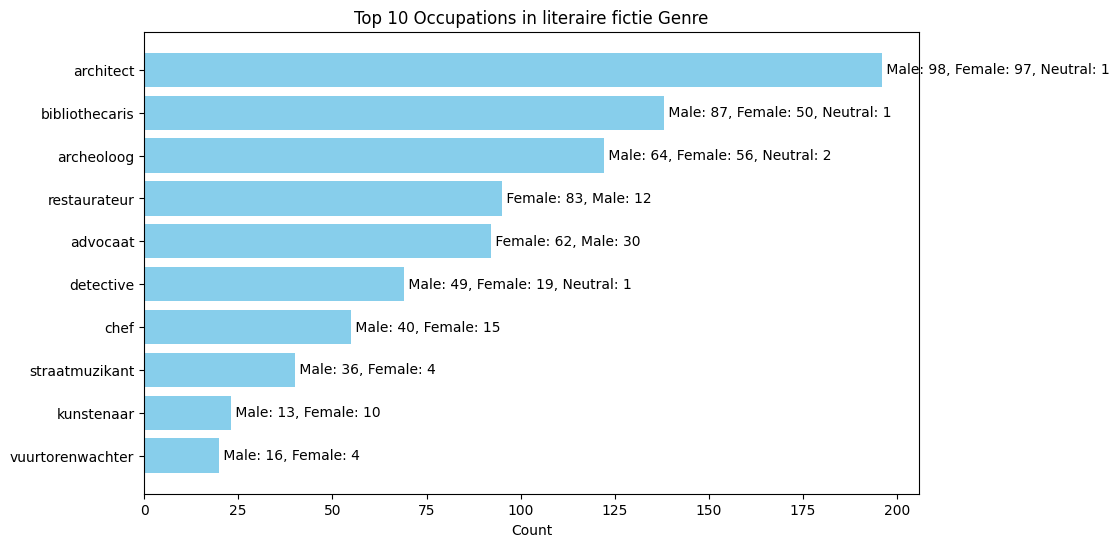

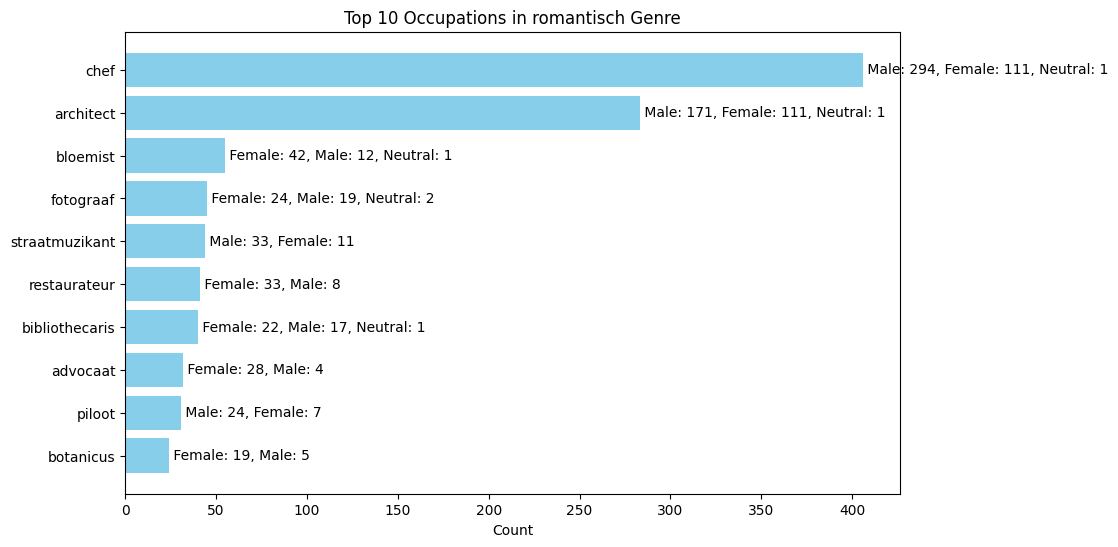

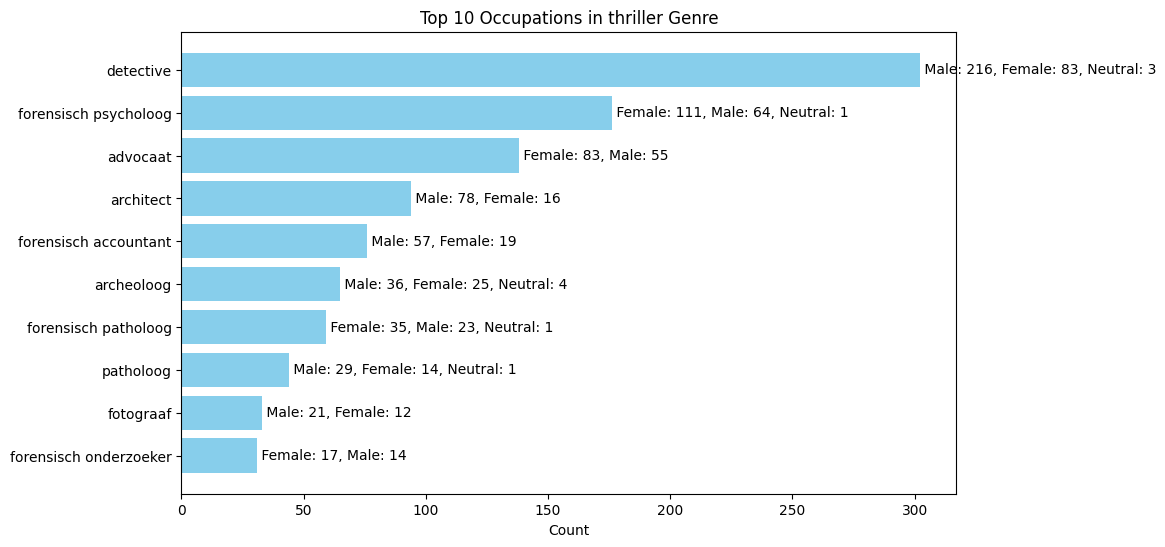

In [ ]:
top_occupations_by_genre = df_gpt.groupby('Genre')['Occupation'].value_counts().groupby(level=0).head(10).reset_index(name='Count')

def get_gender_distribution(genre, occupation):
    subset = df_gpt[(df_gpt['Genre'] == genre) & (df_gpt['Occupation'] == occupation)]
    gender_distribution = subset['Gender_ENG'].value_counts().to_dict()
    return gender_distribution

top_occupations_by_genre['Gender_Distribution'] = top_occupations_by_genre.apply(
    lambda row: get_gender_distribution(row['Genre'], row['Occupation']), axis=1)

print(top_occupations_by_genre.to_string(index=False))

genres = top_occupations_by_genre['Genre'].unique()

for genre in genres:
    subset = top_occupations_by_genre[top_occupations_by_genre['Genre'] == genre]
    occupations = subset['Occupation']
    counts = subset['Count']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(occupations, counts, color='skyblue')
    
    # Adding gender distribution as text
    for bar, gender_dist in zip(bars, subset['Gender_Distribution']):
        width = bar.get_width()
        gender_text = ', '.join([f"{gender}: {count}" for gender, count in gender_dist.items()])
        ax.text(width, bar.get_y() + bar.get_height() / 2, f' {gender_text}', va='center', ha='left')
    
    ax.set_xlabel('Count')
    ax.set_title(f'Top 10 Occupations in {genre} Genre')
    plt.gca().invert_yaxis()  # Highest values on top
    plt.show()

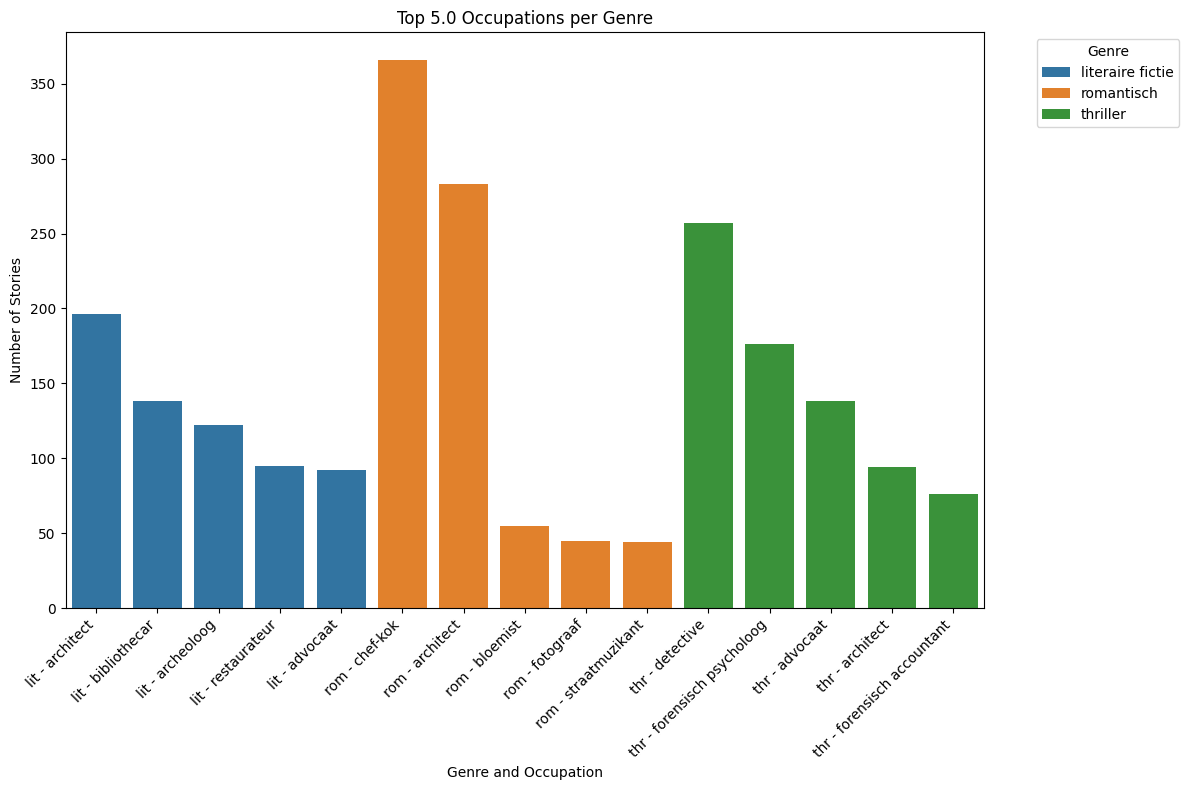

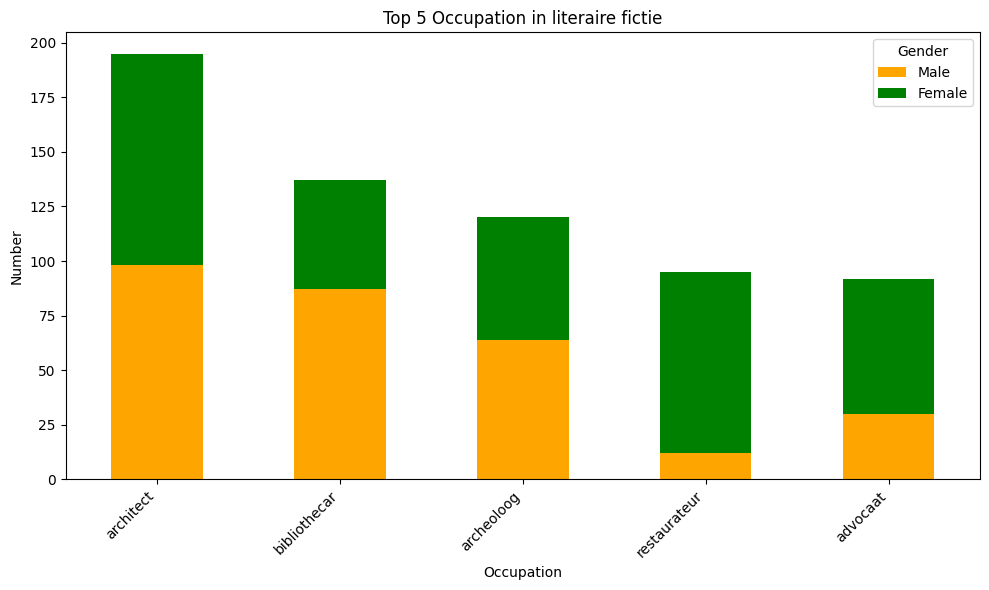

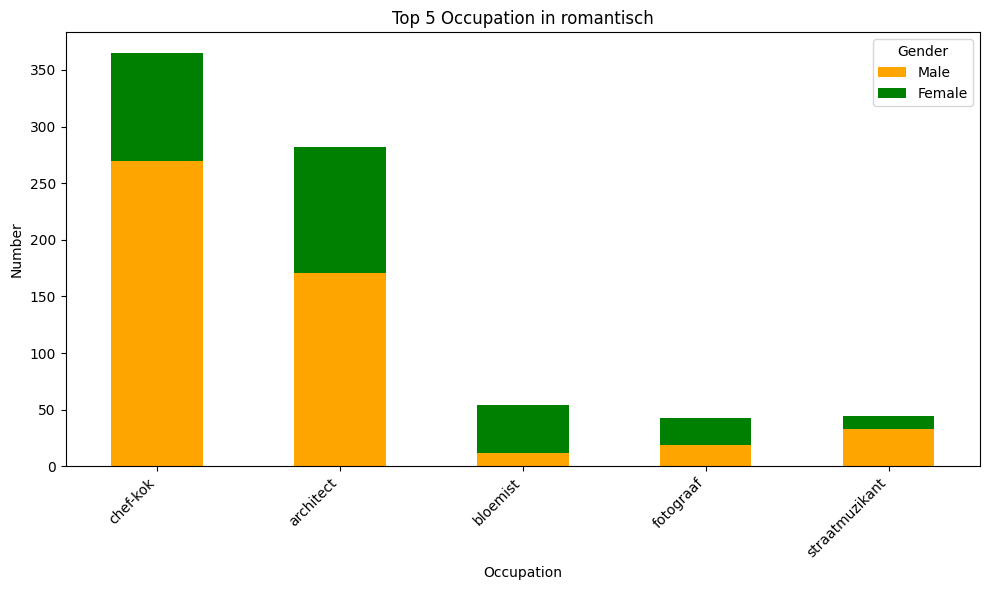

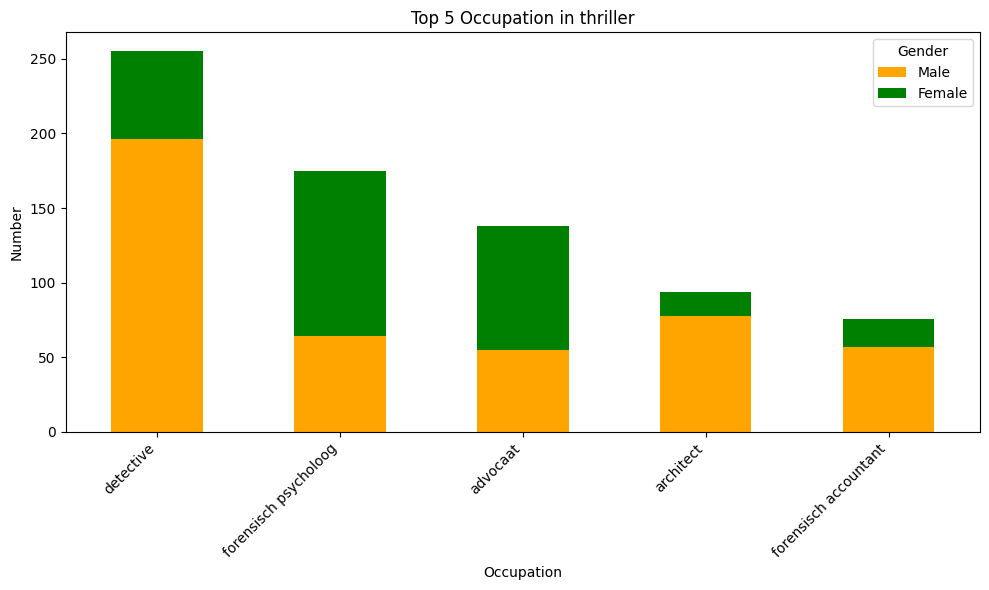

In [ ]:
'''
Genre and occupation
'''
# TO DO: add English translations

df_genre_occupation_gpt = da.Analysis.genre_occ(df_gpt)
da.Analysis.plot_genre_occ(df_genre_occupation_gpt)
da.Analysis.plot_dist_genre_occ(df_genre_occupation_gpt)


### Analysis Llama 2

In [56]:
gender_distribution = {}

# Calculate gender distribution for each occupation
for occupation in df_llama['Occupation'].unique():
    gender_counts = df_llama[df_llama['Occupation'] == occupation]['Gender_ENG'].value_counts().to_dict()
    gender_distribution[occupation] = gender_counts

# Display the gender distribution dictionary
print(gender_distribution)

{'astronaut': {'Female': 61, 'Male': 34}, 'schrijver': {'Male': 199, 'Female': 82, 'Neutral': 2}, 'schilder': {'Male': 315, 'Female': 170, 'Neutral': 2}, 'tennisser': {'Male': 1}, 'auteur': {'Male': 2, 'Female': 2}, 'ambachtsman': {'Male': 2}, 'astroloog': {'Female': 1}, 'kunstenaar': {'Female': 78, 'Male': 20, 'Neutral': 5}, 'tuinman': {'Male': 5, 'Neutral': 2}, 'detective': {'Male': 306, 'Female': 207, 'Neutral': 21}, 'ruimtevaarder': {'Female': 4}, 'ondernemer': {'Female': 47, 'Male': 20}, 'politicus': {'Female': 1}, 'cartograaf': {'Male': 1}, 'maffiabaas': {'Male': 1, 'Female': 1}, 'journalist': {'Female': 312, 'Male': 55, 'Neutral': 10}, 'mysterieus': {'Female': 1}, 'kunstschilder': {'Male': 4}, 'ruimtereiziger': {'Female': 2}, 'fotograaf': {'Female': 161, 'Male': 90}, 'advocaat': {'Male': 43, 'Female': 25, 'Neutral': 1}, 'ingenieur': {'Male': 13, 'Female': 2}, 'kok': {'Male': 14, 'Female': 3}, 'botanicus': {'Female': 4, 'Male': 1}, 'boer': {'Female': 2, 'Neutral': 1}, 'chef': {'N

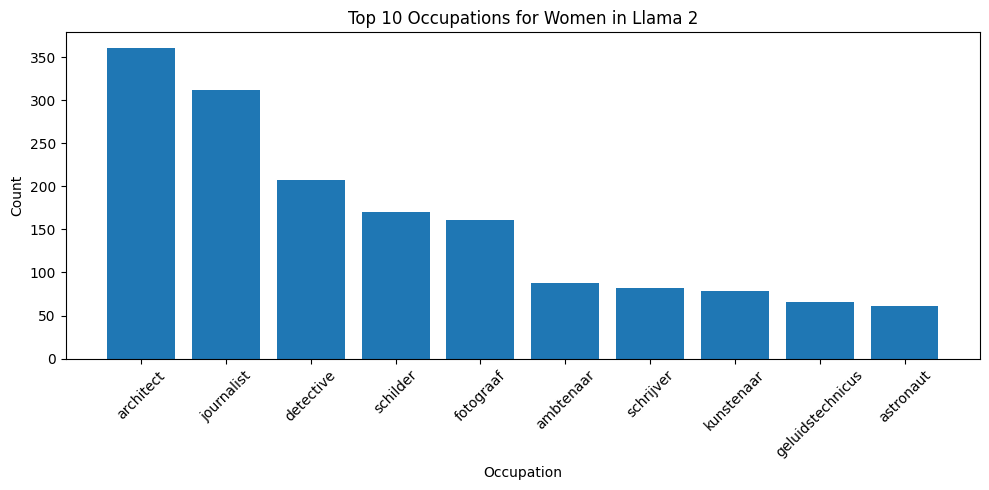

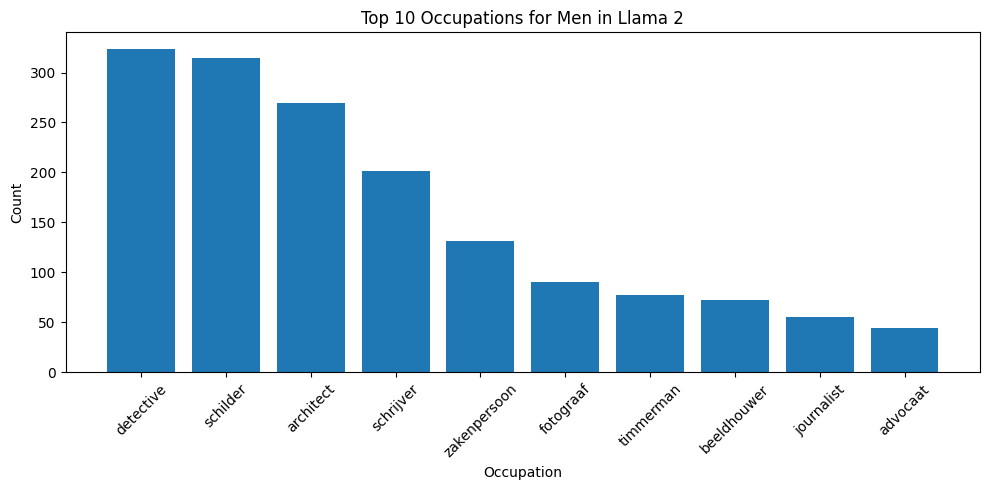

In [10]:
da.Analysis.plot_top_occ_gender(df_llama, 10,'Llama 2')

Gender_ENG    Female  Male  Neutral  Total
Occupation                                
architect        361   269        6    636
detective        207   324       23    554
schilder         170   315        2    487
journalist       312    55       10    377
schrijver         82   201        2    285
fotograaf        161    90        0    251
zakenpersoon      12   131        0    143
kunstenaar        78    20        5    103
astronaut         61    34        0     95
ambtenaar         88     6        0     94


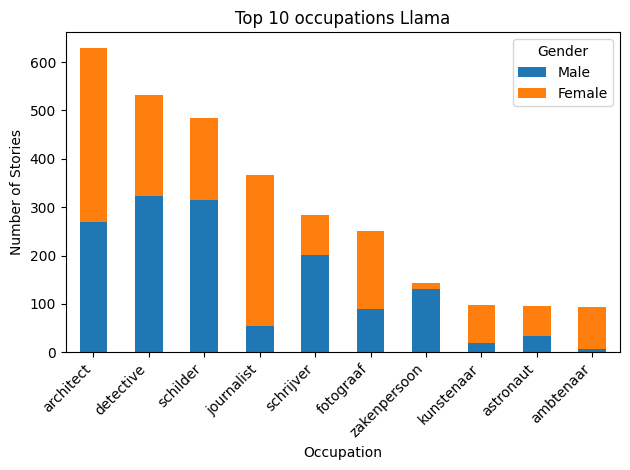

In [14]:
df_top_occupations = da.Analysis.get_top_occupations(df_llama, 10)
print(df_top_occupations)
da.Analysis.plot_top_occupations(df_top_occupations, 'top10-llama.png', 'Top', 'Llama') 

           Genre           Occupation  Count                         Gender_Distribution
literaire fictie             schilder    259   {'Male': 177, 'Female': 80, 'Neutral': 2}
literaire fictie            schrijver    209   {'Male': 154, 'Female': 53, 'Neutral': 2}
literaire fictie            architect    138                  {'Female': 134, 'Male': 4}
literaire fictie            astronaut     93                  {'Female': 60, 'Male': 33}
literaire fictie            ambtenaar     89                   {'Female': 83, 'Male': 6}
literaire fictie           kunstenaar     88    {'Female': 70, 'Male': 14, 'Neutral': 4}
literaire fictie            timmerman     73                                {'Male': 73}
literaire fictie     geluidstechnicus     66                              {'Female': 66}
literaire fictie            fotograaf     41                   {'Female': 35, 'Male': 6}
literaire fictie          meubelmaker     25                                {'Male': 25}
      romantisch     

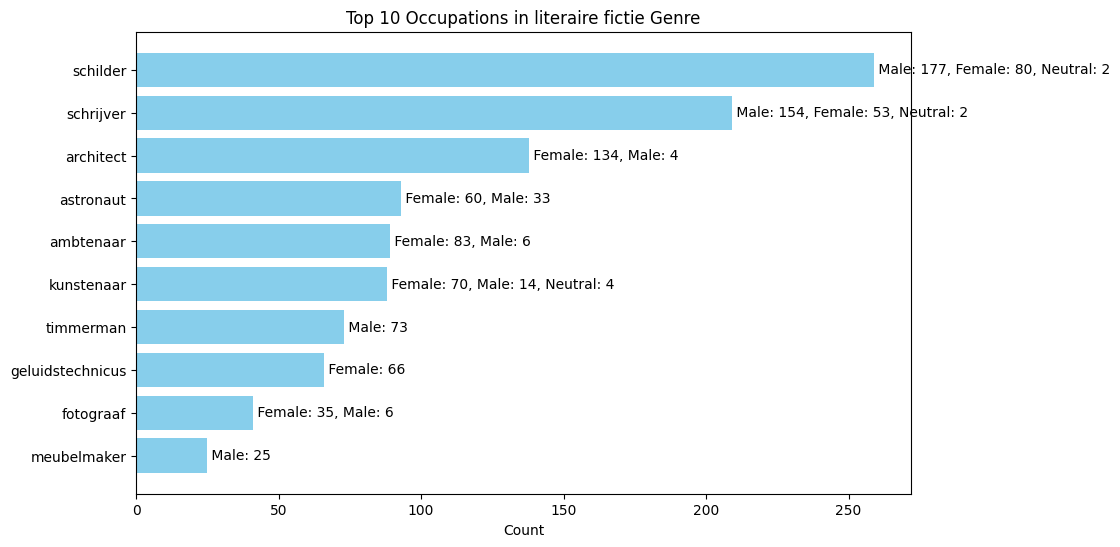

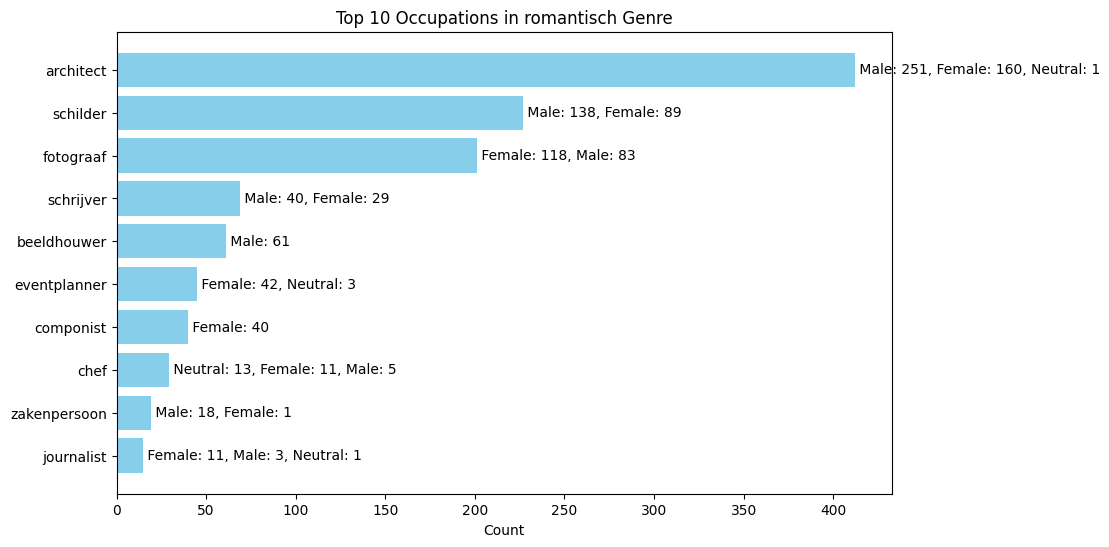

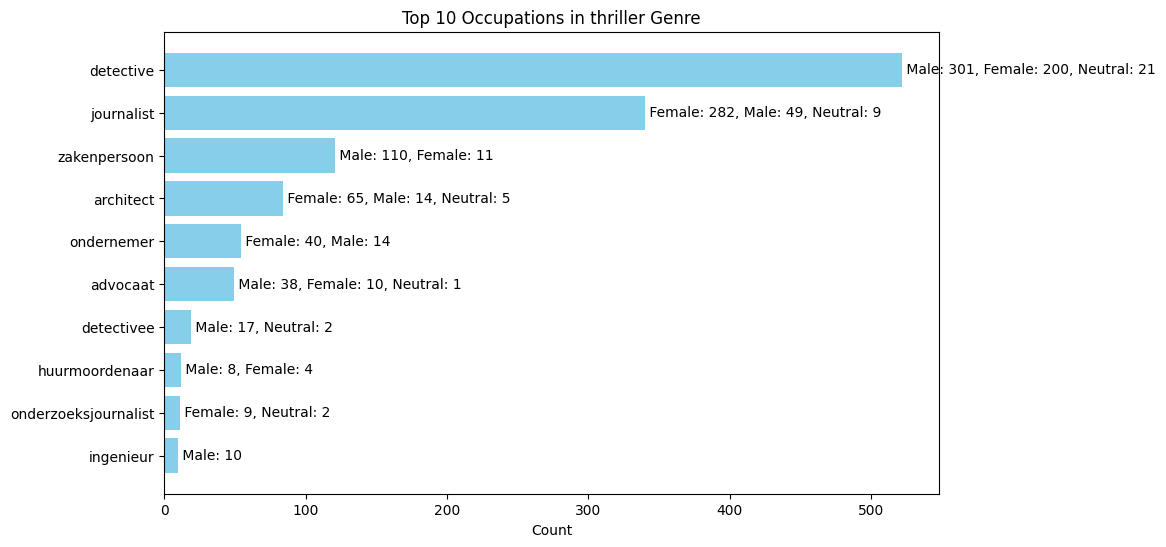

In [ ]:
top_occupations_by_genre = df_llama.groupby('Genre')['Occupation'].value_counts().groupby(level=0).head(10).reset_index(name='Count')

def get_gender_distribution(genre, occupation):
    subset = df_llama[(df_llama['Genre'] == genre) & (df_llama['Occupation'] == occupation)]
    gender_distribution = subset['Gender_ENG'].value_counts().to_dict()
    return gender_distribution

top_occupations_by_genre['Gender_Distribution'] = top_occupations_by_genre.apply(
    lambda row: get_gender_distribution(row['Genre'], row['Occupation']), axis=1)

print(top_occupations_by_genre.to_string(index=False))

genres = top_occupations_by_genre['Genre'].unique()

for genre in genres:
    subset = top_occupations_by_genre[top_occupations_by_genre['Genre'] == genre]
    occupations = subset['Occupation']
    counts = subset['Count']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(occupations, counts, color='skyblue')
    
    # Adding gender distribution as text
    for bar, gender_dist in zip(bars, subset['Gender_Distribution']):
        width = bar.get_width()
        gender_text = ', '.join([f"{gender}: {count}" for gender, count in gender_dist.items()])
        ax.text(width, bar.get_y() + bar.get_height() / 2, f' {gender_text}', va='center', ha='left')
    
    ax.set_xlabel('Count')
    ax.set_title(f'Top 10 Occupations in {genre} Genre')
    plt.gca().invert_yaxis()  # Highest values on top
    plt.show()

In [ ]:
occupation_counts = {}

for occupation in df_llama['Occupation'].unique():
    # Filter the DataFrame for the current occupation
    subset_df = df_llama[df_llama['Occupation'] == occupation]

    counts_gender = subset_df['Gender_ENG'].value_counts().to_dict()

    occupation_counts[occupation] = (counts_gender)

print(occupation_counts)

print(top_10_odds)
for i in top_10_odds:
    print(i[0], occupation_counts[i[0]])

print("\n")
for i in bottom_10_odds:
    print(i[0], occupation_counts[i[0]])

{'detective': {'Male': 280, 'Female': 225}, 'zakenman': {'Male': 155}, 'rechercheur': {'Male': 25}, 'architect': {'Female': 546, 'Male': 350}, 'advocaat': {'Male': 25}, 'meubelmaker': {'Male': 45}, 'schrijver': {'Male': 91}, 'schilder': {'Male': 514, 'Female': 275}, 'beeldhouwer': {'Male': 100}, 'journalist': {'Female': 375}, 'astronaut': {'Female': 134, 'Male': 75}, 'kunstenaar': {'Female': 125, 'Male': 30}, 'fotograaf': {'Female': 125, 'Male': 125}, 'ambtenaar': {'Female': 150, 'Male': 9}, 'geluidstechnicus': {'Female': 150}, 'muurschilder': {'Female': 25}, 'componiste': {'Female': 15}, 'componist': {'Female': 45}, 'timmerman': {'Male': 102}, 'filmmuziekcomponist': {'Female': 10}, 'filmcomponist': {'Female': 5}, 'havenarbeider': {'Male': 25}, 'ruimtevaarder': {'Female': 8}, 'financieel': {'Male': 4}, 'zakelijkheid': {'Male': 4}, 'ondernemer': {'Male': 4}, 'carpenter': {'Male': 4}, 'zakelijk': {'Male': 12}, 'kunstschilder': {'Male': 8}, 'ruimtereiziger': {'Female': 4}, 'astroloog': {'

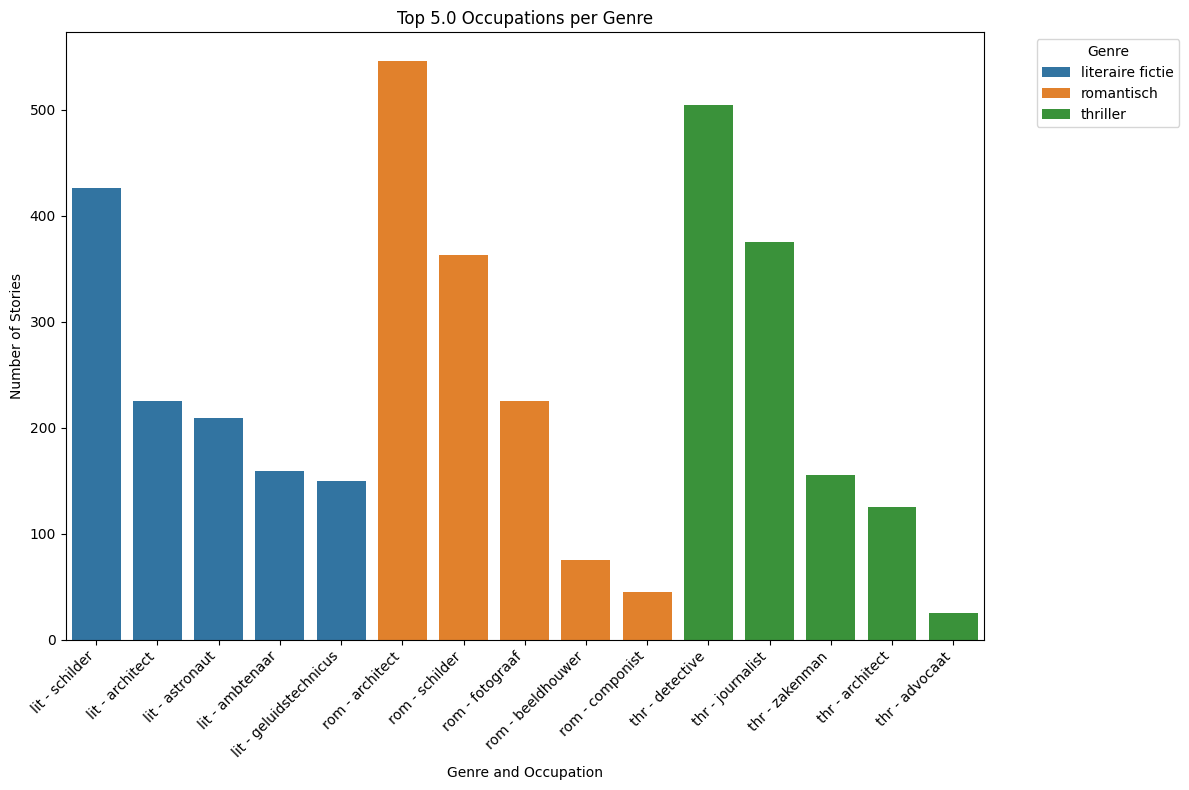

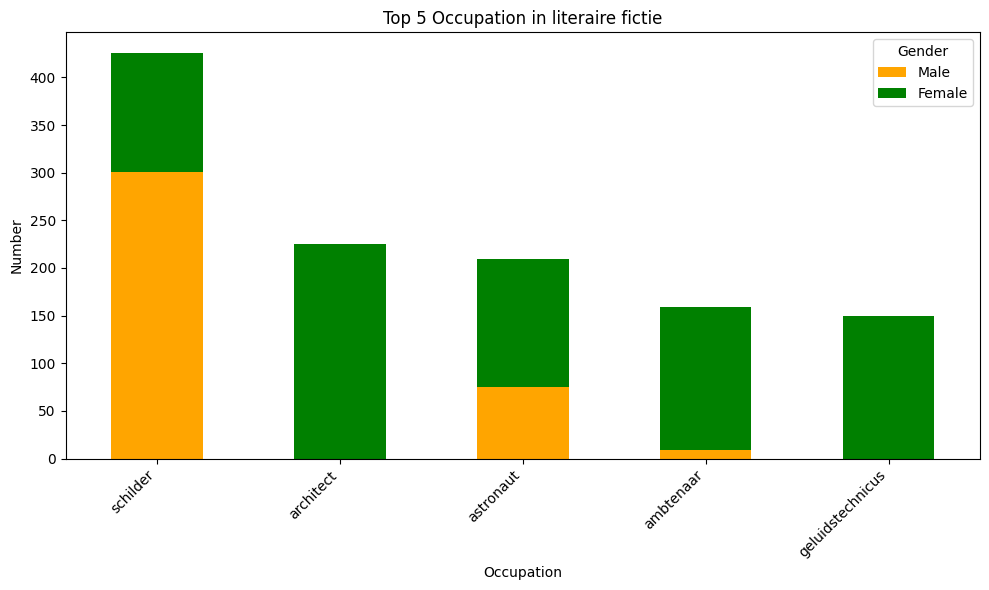

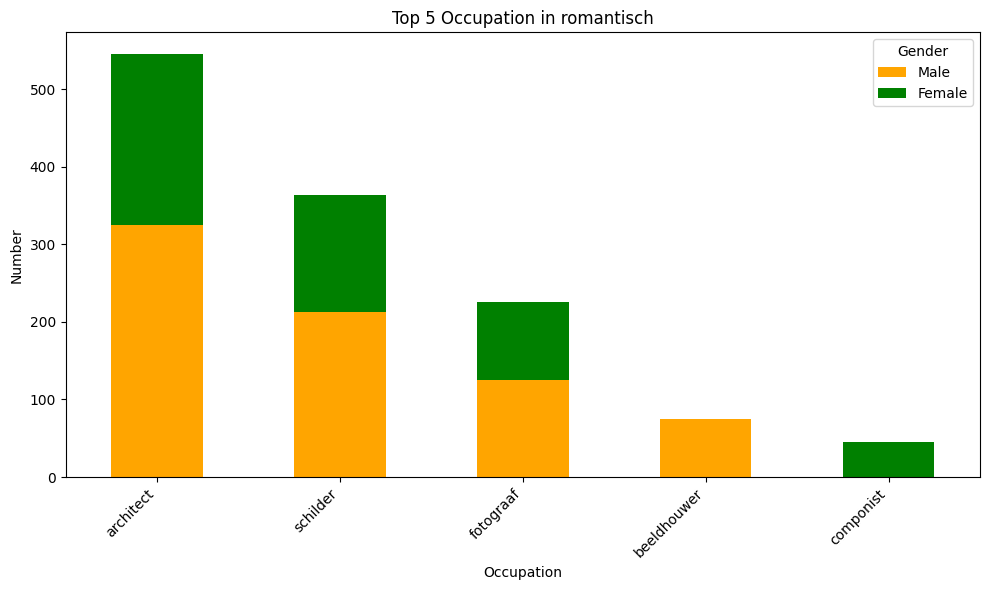

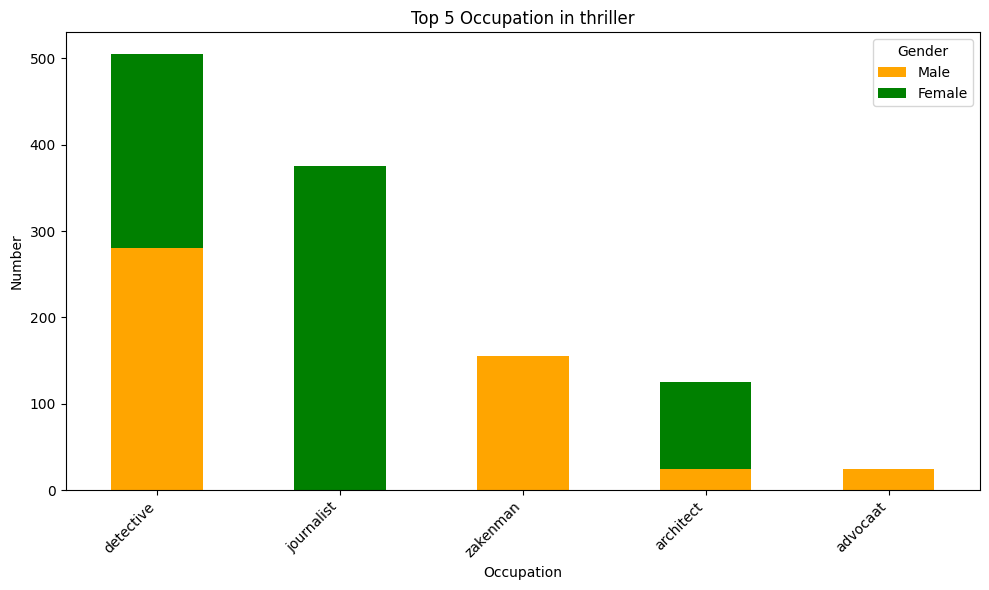

In [ ]:
'''
Genre and occupation
'''

df_genre_occupation = da.Analysis.genre_occ(df_llama)
da.Analysis.plot_genre_occ(df_genre_occupation)
da.Analysis.plot_dist_genre_occ(df_genre_occupation)


In [ ]:
df_genre_occupation

Gender_ENG,Genre,Occupation,Female,Male,Total,Genre_Occupation
0,literaire fictie,schilder,125,301,426,lit - schilder
1,literaire fictie,architect,225,0,225,lit - architect
2,literaire fictie,astronaut,134,75,209,lit - astronaut
3,literaire fictie,ambtenaar,150,9,159,lit - ambtenaar
4,literaire fictie,geluidstechnicus,150,0,150,lit - geluidstechnicus
5,romantisch,architect,221,325,546,rom - architect
6,romantisch,schilder,150,213,363,rom - schilder
7,romantisch,fotograaf,100,125,225,rom - fotograaf
8,romantisch,beeldhouwer,0,75,75,rom - beeldhouwer
9,romantisch,componist,45,0,45,rom - componist


### Prompts

In [ ]:
# GPT-3.5
occupation_counts = df_gpt.groupby('Prompt_type')['Occupation'].value_counts().groupby(level=0).nlargest(5)

print(occupation_counts)

Prompt_type      Prompt_type      Occupation           
completion       completion       detective                273
                                  chef-kok                 207
                                  advocaat                  84
                                  archeoloog                62
                                  chef                      49
contextual       contextual       architect                141
                                  bibliothecar             114
                                  advocaat                 108
                                  chef-kok                  90
                                  forensisch psycholoog     61
instructional    instructional    architect                265
                                  restaurateur             120
                                  straatmuzikant            75
                                  archeoloog                61
                                  forensisch psycholoog     52

    Prompt_type            Occupation  Count                        Gender_Distribution
     completion             detective    303  {'Male': 218, 'Female': 81, 'Neutral': 4}
     completion                  chef    256                {'Male': 190, 'Female': 66}
     completion              advocaat     84                 {'Female': 64, 'Male': 20}
     completion            archeoloog     62                 {'Male': 42, 'Female': 20}
     completion                piloot     46                 {'Male': 35, 'Female': 11}
     contextual             architect    141                {'Male': 105, 'Female': 36}
     contextual        bibliothecaris    114                 {'Male': 69, 'Female': 45}
     contextual              advocaat    108                 {'Female': 58, 'Male': 50}
     contextual                  chef     94                 {'Male': 64, 'Female': 30}
     contextual forensisch psycholoog     61                 {'Female': 32, 'Male': 29}
  instructional             arch

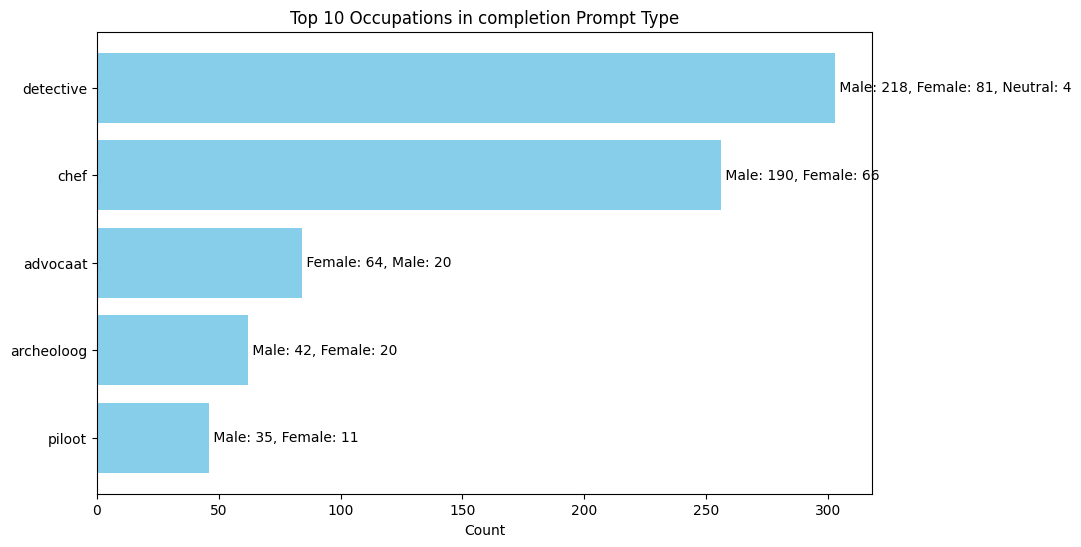

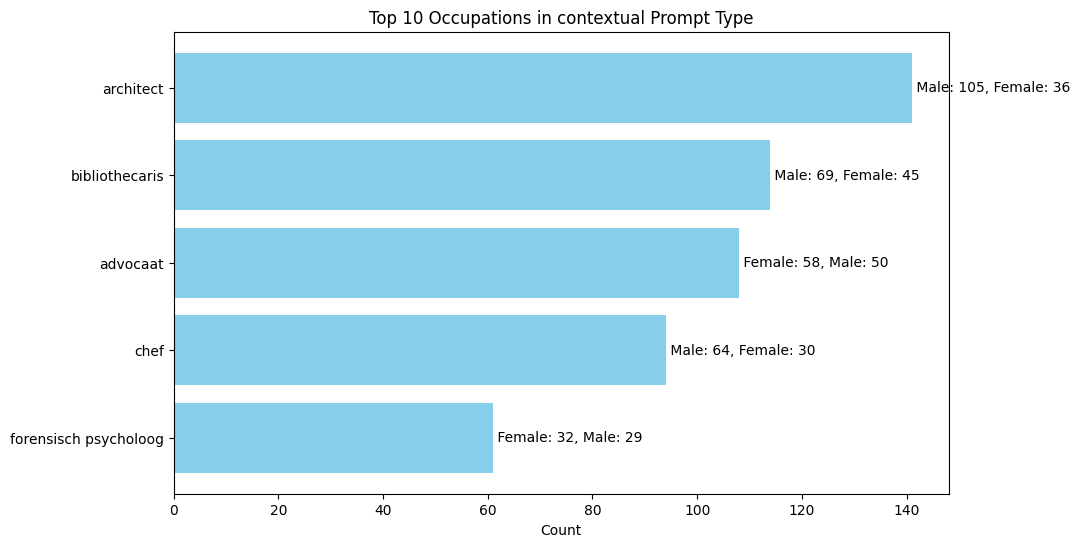

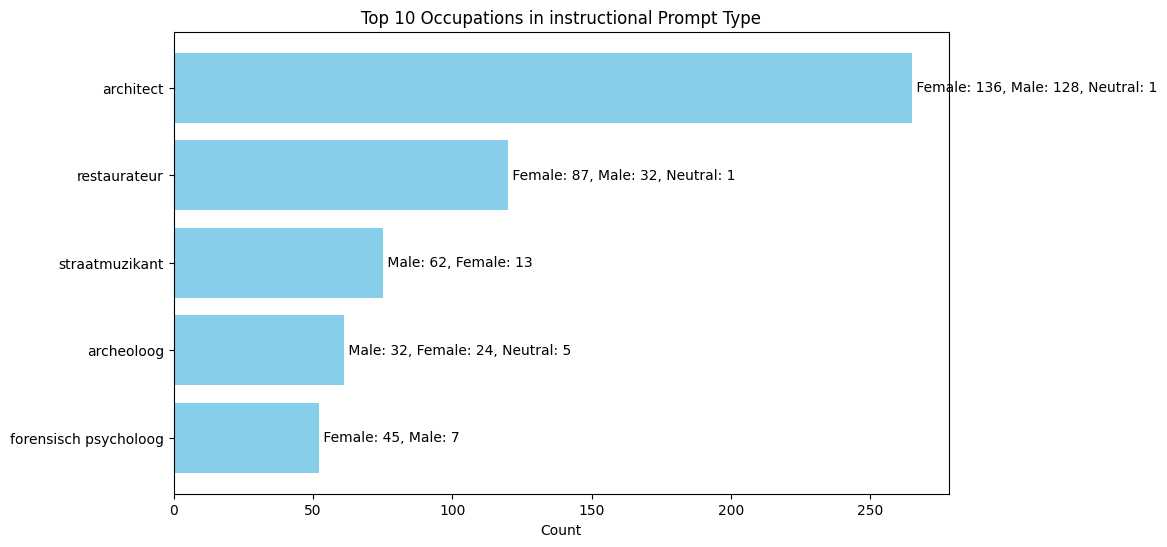

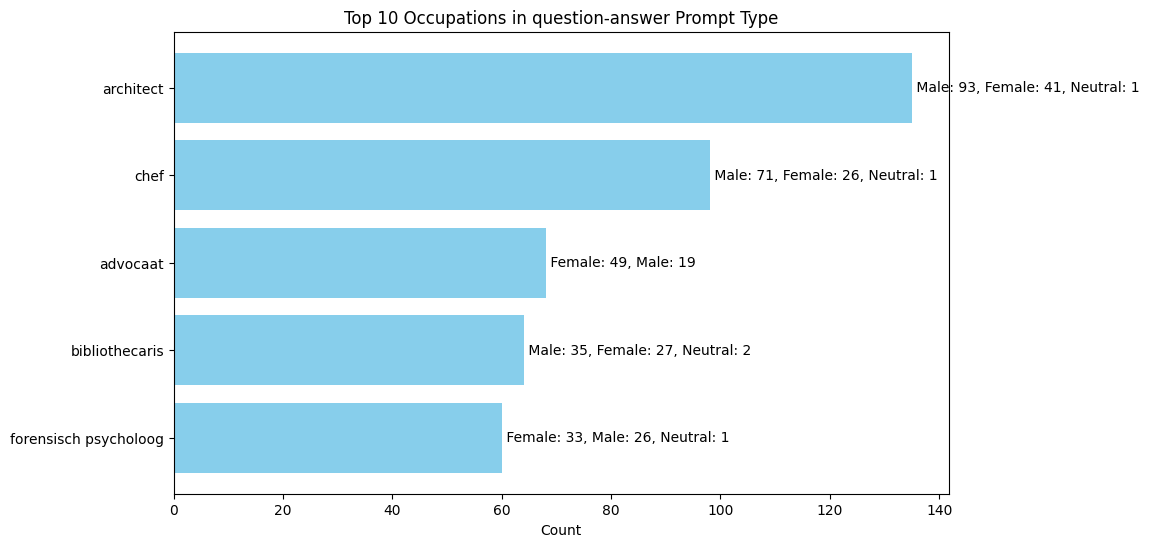

In [ ]:
# GPT-3.5
top_occupations_by_prompt = df_gpt.groupby('Prompt_type')['Occupation'].value_counts().groupby(level=0).head(5).reset_index(name='Count')

def get_gender_distribution(prompt_type, occupation):
    subset = df_gpt[(df_gpt['Prompt_type'] == prompt_type) & (df_gpt['Occupation'] == occupation)]
    gender_distribution = subset['Gender_ENG'].value_counts().to_dict()
    return gender_distribution

top_occupations_by_prompt['Gender_Distribution'] = top_occupations_by_prompt.apply(
    lambda row: get_gender_distribution(row['Prompt_type'], row['Occupation']), axis=1)

print(top_occupations_by_prompt.to_string(index=False))

prompt_types = top_occupations_by_prompt['Prompt_type'].unique()

for prompt_type in prompt_types:
    subset = top_occupations_by_prompt[top_occupations_by_prompt['Prompt_type'] == prompt_type]
    occupations = subset['Occupation']
    counts = subset['Count']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(occupations, counts, color='skyblue')
    
    for bar, gender_dist in zip(bars, subset['Gender_Distribution']):
        width = bar.get_width()
        gender_text = ', '.join([f"{gender}: {count}" for gender, count in gender_dist.items()])
        ax.text(width, bar.get_y() + bar.get_height() / 2, f' {gender_text}', va='center', ha='left')
    
    ax.set_xlabel('Count')
    ax.set_title(f'Top 10 Occupations in {prompt_type} Prompt Type')
    plt.gca().invert_yaxis()  # Highest values on top
    plt.show()


In [ ]:
# Llama 2
occupation_counts = df_llama.groupby('Prompt_type')['Occupation'].value_counts().groupby(level=0).nlargest(10)
print(occupation_counts)

Prompt_type      Prompt_type      Occupation      
completion       completion       detective           345
                                  schilder            274
                                  schrijver           215
                                  astronaut            95
                                  fotograaf            40
                                  kunstenaar           13
                                  auteur                4
                                  kok                   4
                                  kunstschilder         4
                                  ruimtevaarder         4
contextual       contextual       journalist          152
                                  architect           146
                                  ambtenaar            82
                                  timmerman            67
                                  beeldhouwer          61
                                  detective            60
                     

    Prompt_type   Occupation  Count                        Gender_Distribution
     completion    detective    345 {'Male': 178, 'Female': 158, 'Neutral': 9}
     completion     schilder    274                {'Male': 187, 'Female': 87}
     completion    schrijver    215                {'Male': 152, 'Female': 63}
     completion    astronaut     95                 {'Female': 61, 'Male': 34}
     completion    fotograaf     40                  {'Male': 39, 'Female': 1}
     contextual   journalist    152  {'Female': 107, 'Male': 42, 'Neutral': 3}
     contextual    architect    146                 {'Male': 81, 'Female': 65}
     contextual    ambtenaar     82                  {'Female': 81, 'Male': 1}
     contextual    timmerman     67                               {'Male': 67}
     contextual  beeldhouwer     61                               {'Male': 61}
  instructional    architect    330  {'Female': 240, 'Male': 87, 'Neutral': 3}
  instructional    fotograaf    137                {

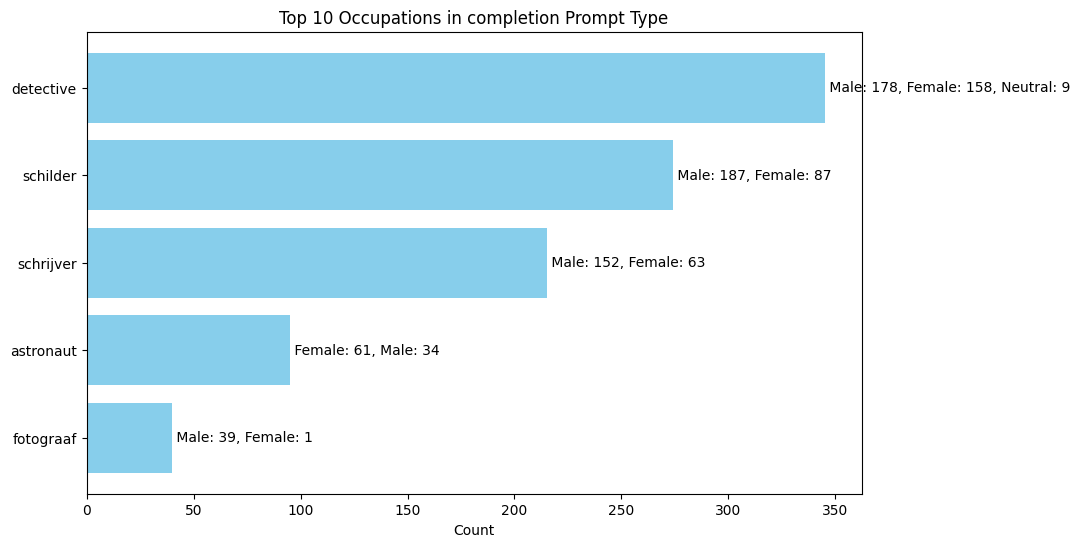

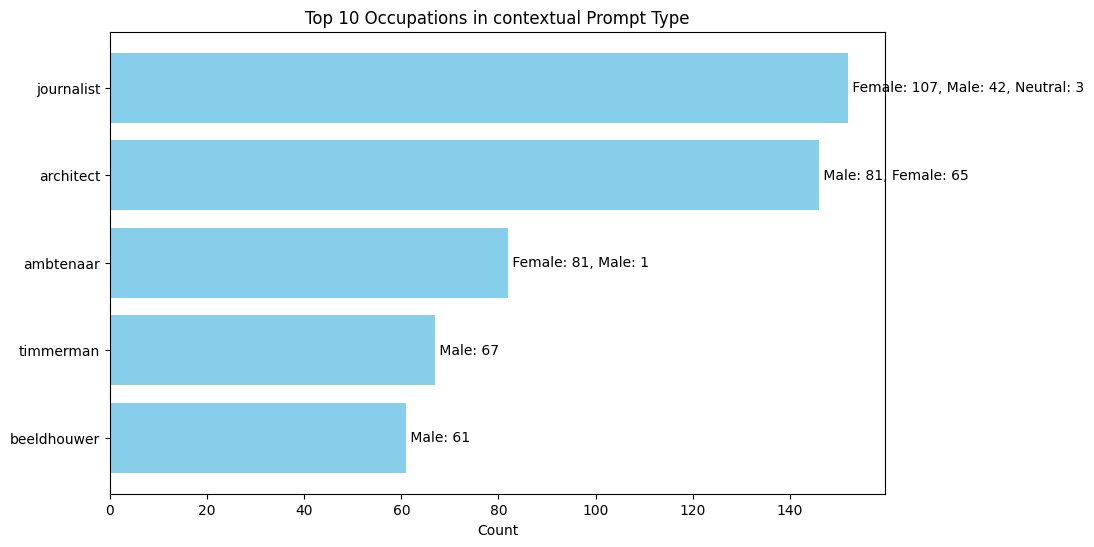

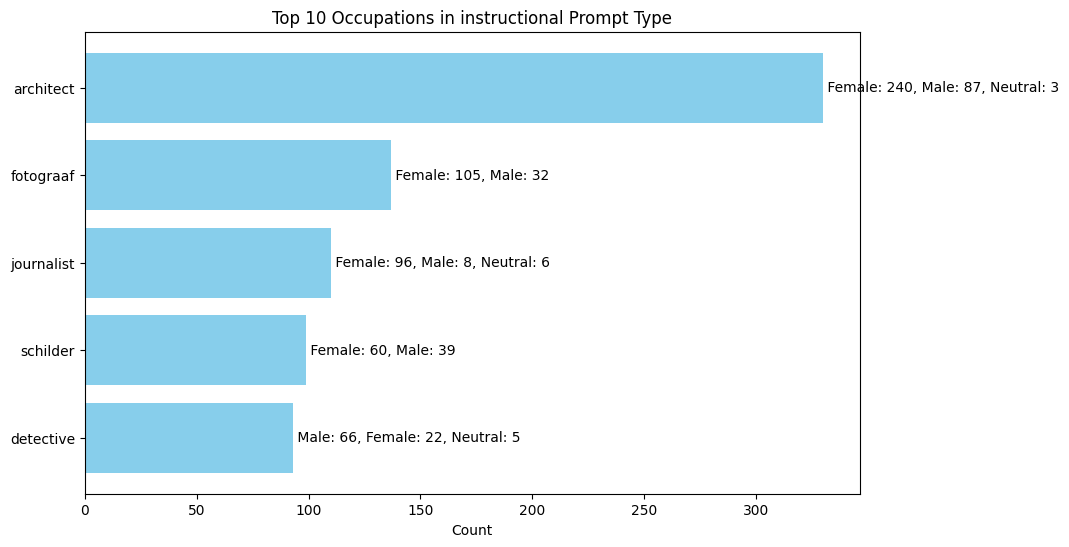

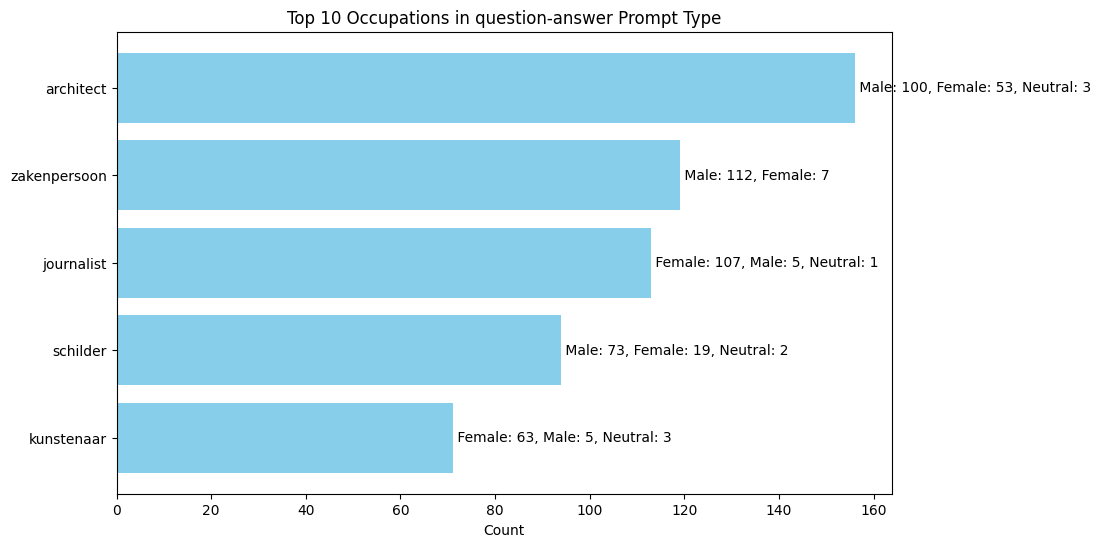

In [ ]:
# Llama 2
top_occupations_by_prompt = df_llama.groupby('Prompt_type')['Occupation'].value_counts().groupby(level=0).head(5).reset_index(name='Count')

def get_gender_distribution(prompt_type, occupation):
    subset = df_llama[(df_llama['Prompt_type'] == prompt_type) & (df_llama['Occupation'] == occupation)]
    gender_distribution = subset['Gender_ENG'].value_counts().to_dict()
    return gender_distribution

top_occupations_by_prompt['Gender_Distribution'] = top_occupations_by_prompt.apply(
    lambda row: get_gender_distribution(row['Prompt_type'], row['Occupation']), axis=1)

print(top_occupations_by_prompt.to_string(index=False))

prompt_types = top_occupations_by_prompt['Prompt_type'].unique()

for prompt_type in prompt_types:
    subset = top_occupations_by_prompt[top_occupations_by_prompt['Prompt_type'] == prompt_type]
    occupations = subset['Occupation']
    counts = subset['Count']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(occupations, counts, color='skyblue')
    
    # Adding gender distribution as text
    for bar, gender_dist in zip(bars, subset['Gender_Distribution']):
        width = bar.get_width()
        gender_text = ', '.join([f"{gender}: {count}" for gender, count in gender_dist.items()])
        ax.text(width, bar.get_y() + bar.get_height() / 2, f' {gender_text}', va='center', ha='left')
    
    ax.set_xlabel('Count')
    ax.set_title(f'Top 10 Occupations in {prompt_type} Prompt Type')
    plt.gca().invert_yaxis()  # Highest values on top
    plt.show()


# Odds Ratio

In [6]:
def odds_ratio(df):
    """
    Calculate the odds ratios of being male for each occupation in comparison to being female.

    Returns:
    list: A list of tuples containing occupations and their corresponding odds ratios, sorted in descending order.
    """
    # Calculate total counts of males and females
    total_gender = df['Gender_ENG'].value_counts()
    total_m = total_gender.get('Male', 0)
    total_f = total_gender.get('Female', 0)

    # Group by Occupation and Gender_ENG and count occurrences
    occupation_group = df.groupby(['Occupation', 'Gender_ENG']).size().unstack(fill_value=0)
    
    # Adding small constant to avoid division by zero
    small_const = 0.5
    occupation_group['Male'] += small_const
    occupation_group['Female'] += small_const
    
    # Calculate odds ratio
    a = occupation_group['Male']
    c = occupation_group['Female']
    b = total_m - a + small_const
    d = total_f - c + small_const
    
    occupation_group['Odds_Ratio'] = (a * d) / (b * c)

    # Sort by odds ratio in descending order
    sorted_odds_desc = occupation_group['Odds_Ratio'].sort_values(ascending=False).reset_index()
    
    return sorted_odds_desc.values.tolist()

In [ ]:
odds_ratio_gpt = odds_ratio(df_gpt)
odds_ratio_gpt.to_csv('data/odds_ratio_gpt.csv', index=False, sep=';')

odds_ratio_llama = odds_ratio(df_llama)
odds_ratio_llama.to_csv('data/odds_ratio_llama.csv', index=False, sep=';')

In [ ]:
# Analyze the distribution of odds ratios
llama_median_or = odds_ratio_llama['Odds_Ratio'].median()
gpt_median_or = odds_ratio_gpt['Odds_Ratio'].median()

# Determine the number of occupations more likely assigned to men vs. women
llama_men_dominated = odds_ratio_llama[odds_ratio_llama['Odds_Ratio'] > 1].shape[0]
llama_women_dominated = odds_ratio_llama[odds_ratio_llama['Odds_Ratio'] < 1].shape[0]

gpt_men_dominated = odds_ratio_gpt[odds_ratio_gpt['Odds_Ratio'] > 1].shape[0]
gpt_women_dominated = odds_ratio_gpt[odds_ratio_gpt['Odds_Ratio'] < 1].shape[0]

# Print results
print(f"Llama 2 - Median Odds Ratio: {llama_median_or}")
print(f"Llama 2 - Men Dominated Occupations: {llama_men_dominated}, Women Dominated Occupations: {llama_women_dominated}")

print(f"GPT-3.5 - Median Odds Ratio: {gpt_median_or}")
print(f"GPT-3.5 - Men Dominated Occupations: {gpt_men_dominated}, Women Dominated Occupations: {gpt_women_dominated}")


Llama 2 - Median Odds Ratio: 0.7088722113016979
Llama 2 - Men Dominated Occupations: 137, Women Dominated Occupations: 141
GPT-3.5 - Median Odds Ratio: 0.8606101091071031
GPT-3.5 - Men Dominated Occupations: 157, Women Dominated Occupations: 188
